In [1]:
# Google Drive Mount

from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
 cd gdrive/My Drive/와이빅타/컨퍼런스/미니 컨퍼런스(Game bot detection)

/content/gdrive/My Drive/와이빅타/컨퍼런스/미니 컨퍼런스(Game bot detection)


# Game bot detection

In [0]:
import numpy as np
import pandas as pd
pd.set_option("max_columns", 999)
pd.set_option("max_rows", 999)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import pandas_profiling as pp

## Player action 분석

In [5]:
# 학습 데이터를 불러옵니다.
P_a_befor = pd.read_csv("./data/(before) Player actions features.csv")
P_a_after = pd.read_csv("./data/(after) Player actions features.csv")
# 데이터 크기 확인
print('data size:', P_a_befor.shape)
print("data size:", P_a_after.shape)

data size: (4885552, 4)
data size: (49739, 31)


In [17]:
col = ['Type', 'Actor', 'A_Acc', 'collect_max_count', 'Sit_ratio', 'Sit_count',
       'sit_count_per_day', 'Exp_get_ratio', 'Exp_get_count',
       'exp_get_count_per_day', 'Item_get_ratio', 'Item_get_count',
       'item_get_count_per_day', 'Money_get_ratio', 'Money_get_count',
       'money_get_count_per_day', 'Abyss_get_ratio', 'Abyss_get_count',
       'abyss_get_count_per_day', 'Exp_repair_count',
       'Exp_repair_count_per_day', 'Use_portal_count',
       'Use_portal_count_per_day', 'Killed_bypc_count',
       'Killed_bypc_count_per_day', 'Killed_bynpc_count',
       'Killed_bynpc_count_per_day', 'Teleport_count',
       'Teleport_count_per_day', 'Reborn_count', 'Reborn_count_per_day']
P_a_after = P_a_after[col] #columns 순서 바꾸기(Type을 가장 앞으로 가져오기)
P_a_after['Type'] = P_a_after['Type'].apply(lambda x: 0 if x=="Human" else 1) #human이면 0 bot이면 1로 설정
P_a_after.head()

,Type,Actor,A_Acc,collect_max_count,Sit_ratio,Sit_count,sit_count_per_day,Exp_get_ratio,Exp_get_count,exp_get_count_per_day,Item_get_ratio,Item_get_count,item_get_count_per_day,Money_get_ratio,Money_get_count,money_get_count_per_day,Abyss_get_ratio,Abyss_get_count,abyss_get_count_per_day,Exp_repair_count,Exp_repair_count_per_day,Use_portal_count,Use_portal_count_per_day,Killed_bypc_count,Killed_bypc_count_per_day,Killed_bynpc_count,Killed_bynpc_count_per_day,Teleport_count,Teleport_count_per_day,Reborn_count,Reborn_count_per_day
0,0,1047,6482393,6,1.0430,1012,24.0952,15.5210,15060,358.5714,6.2847,6098,145.1905,10.2010,9898,235.666667,11.0636,10735,255.5952,66,1.5714,2,0.0476,690,16.4286,172,4.0952,1051,25.0238,2,0.0476
1,0,1049,6275719,0,3.5570,141,8.8125,13.6226,540,33.7500,6.9122,274,17.1250,7.5429,299,18.687500,2.8507,113,7.0625,3,0.1875,2,0.1250,30,1.8750,16,1.0000,118,7.3750,0,0.0000
2,0,1120,6596993,3,4.9882,190,47.5000,15.6734,597,149.2500,13.5994,518,129.5000,9.7926,373,93.250000,0.0000,0,0.0000,15,3.7500,0,0.0000,0,0.0000,20,5.0000,37,9.2500,0,0.0000
3,0,1164,6670686,0,0.8581,30,3.3333,17.8776,625,69.4444,6.8650,240,26.6667,13.5584,474,52.666667,8.0950,283,31.4444,0,0.0000,0,0.0000,26,2.8889,6,0.6667,61,6.7778,0,0.0000
4,0,1184,4220231,4,4.2667,215,19.5455,18.0194,908,82.5455,8.0572,406,36.9091,9.2876,468,42.545455,1.2502,63,5.7273,3,0.2727,0,0.0000,6,0.5455,17,1.5455,54,4.9091,0,0.0000


### EDA

In [0]:
#결측치 확인
P_a_after.isnull().sum()

Type                          0
Actor                         0
A_Acc                         0
collect_max_count             0
Sit_ratio                     0
Sit_count                     0
sit_count_per_day             0
Exp_get_ratio                 0
Exp_get_count                 0
exp_get_count_per_day         0
Item_get_ratio                0
Item_get_count                0
item_get_count_per_day        0
Money_get_ratio               0
Money_get_count               0
money_get_count_per_day       0
Abyss_get_ratio               0
Abyss_get_count               0
abyss_get_count_per_day       0
Exp_repair_count              0
Exp_repair_count_per_day      0
Use_portal_count              0
Use_portal_count_per_day      0
Killed_bypc_count             0
Killed_bypc_count_per_day     0
Killed_bynpc_count            0
Killed_bynpc_count_per_day    0
Teleport_count                0
Teleport_count_per_day        0
Reborn_count                  0
Reborn_count_per_day          0
dtype: i

#### 데이터에서 Game bot과 Human의 비율

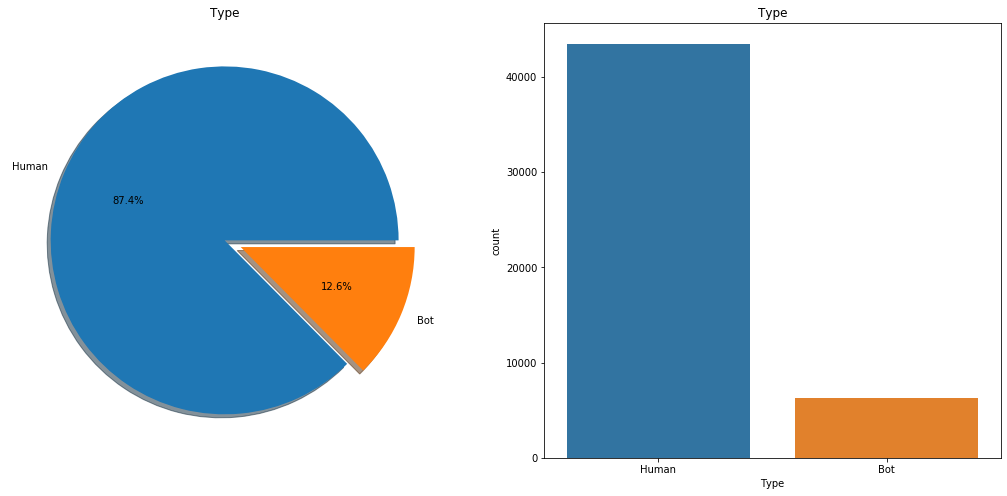

In [0]:
f,ax=plt.subplots(1,2,figsize=(18,8))
P_a_after['Type'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Type')
ax[0].set_ylabel('')
sns.countplot('Type',data=P_a_after,ax=ax[1])
ax[1].set_title('Type')
plt.show()

#### Sit_count, sit_count_per_day	

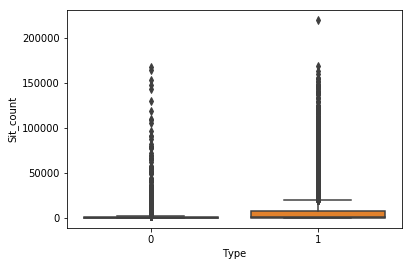

In [0]:
sns.boxplot(x="Type", y="Sit_count", data=P_a_after)

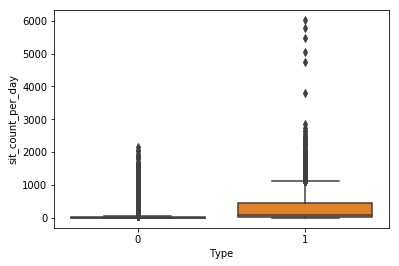

In [0]:
sns.boxplot(x="Type", y="sit_count_per_day", data=P_a_after)

**분포가 편향되어 있다. log scale을 해서 맞춰주자**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


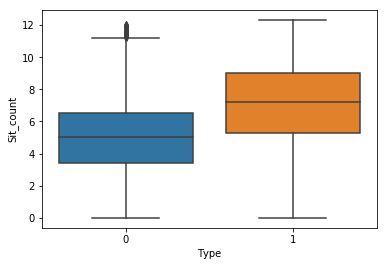

In [0]:
P_a_after["Sit_count"] = np.log(P_a_after["Sit_count"])
sns.boxplot(x="Type", y="Sit_count", data=P_a_after)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


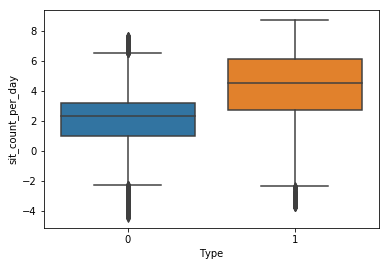

In [0]:
P_a_after["sit_count_per_day"] = np.log(P_a_after["sit_count_per_day"])
sns.boxplot(x="Type", y="sit_count_per_day", data=P_a_after)

#### Exp_get(count, per_day) -> 이것은 log scale로 하니깐 더 성능이 떨어진다 일단 그대로 두고 다른 방법을 생각해보자

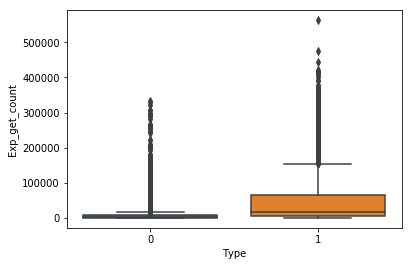

In [0]:
sns.boxplot(x="Type", y="Exp_get_count", data=P_a_after)

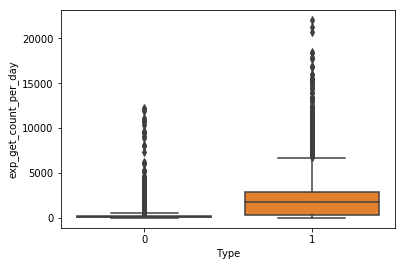

In [0]:
sns.boxplot(x="Type", y="exp_get_count_per_day", data=P_a_after)

분포가 편향되어 있다. log scale을 해서 맞춰주자

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


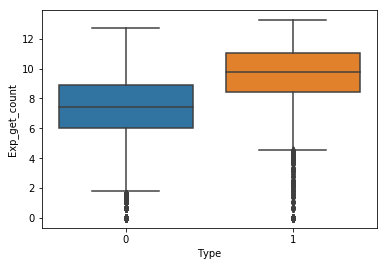

In [0]:
P_a_after["Exp_get_count"] = np.log(P_a_after["Exp_get_count"])
sns.boxplot(x="Type", y="Exp_get_count", data=P_a_after)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


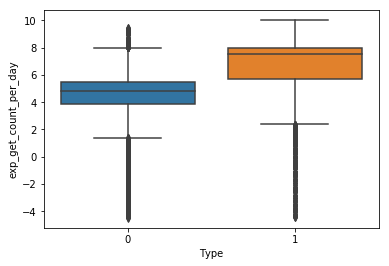

In [0]:
P_a_after["exp_get_count_per_day"] = np.log(P_a_after["exp_get_count_per_day"])
sns.boxplot(x="Type", y="exp_get_count_per_day", data=P_a_after)

#### Item_get(count, ratio, per_day)

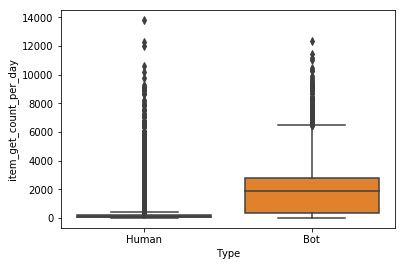

In [9]:
sns.boxplot(x="Type", y="item_get_count_per_day", data=P_a_after)

#### Money_get_count

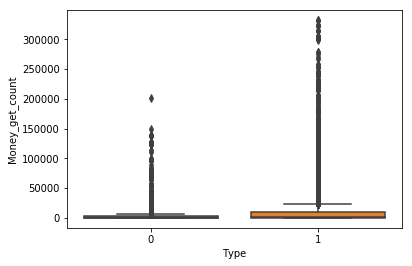

In [0]:
sns.boxplot(x="Type", y="Money_get_count", data=P_a_after)

In [0]:
P_a_after["Money_get_count"].sort_values()

1430          -inf
29776         -inf
29771         -inf
10874         -inf
29729         -inf
10984         -inf
925           -inf
10996         -inf
11051         -inf
29583         -inf
29567         -inf
29782         -inf
29566         -inf
5482          -inf
29463         -inf
11188         -inf
29427         -inf
29425         -inf
29312         -inf
29251         -inf
1001          -inf
29136         -inf
1026          -inf
11081         -inf
11485         -inf
29785         -inf
5556          -inf
30119         -inf
10649         -inf
30115         -inf
30112         -inf
41305         -inf
5604          -inf
10699         -inf
10722         -inf
10739         -inf
29978         -inf
5550          -inf
29973         -inf
29962         -inf
5579          -inf
29931         -inf
29929         -inf
10775         -inf
29923         -inf
29922         -inf
10789         -inf
29915         -inf
29869         -inf
29968         -inf
5624          -inf
11513         -inf
28886       

**분포가 편향되어 있다. log scale을 해서 맞춰주자**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


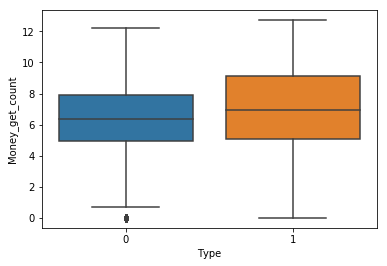

In [0]:
P_a_after["Money_get_count"] = np.log(P_a_after["Money_get_count"])
sns.boxplot(x="Type", y="Money_get_count", data=P_a_after)

### pandas profiling 결과

In [0]:
pp.ProfileReport(P_a_after)

Number of variables,31
Number of observations,49739
Total Missing (%),0.0%
Total size in memory,11.8 MiB
Average record size in memory,248.0 B
Numeric,29
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,1


### 상관계수 분석

In [0]:
P_a_after.corr()

,Type,Actor,A_Acc,collect_max_count,Sit_ratio,Sit_count,sit_count_per_day,Exp_get_ratio,Exp_get_count,exp_get_count_per_day,Item_get_ratio,Item_get_count,item_get_count_per_day,Money_get_ratio,Money_get_count,money_get_count_per_day,Abyss_get_ratio,Abyss_get_count,abyss_get_count_per_day,Exp_repair_count,Exp_repair_count_per_day,Use_portal_count,Use_portal_count_per_day,Killed_bypc_count,Killed_bypc_count_per_day,Killed_bynpc_count,Killed_bynpc_count_per_day,Teleport_count,Teleport_count_per_day,Reborn_count,Reborn_count_per_day
Type,1.000000,0.155601,0.283073,0.329672,0.250126,0.228588,0.480664,0.328670,0.461762,0.578914,0.472474,0.409107,0.621248,-0.055439,0.109150,0.298685,-0.170231,-0.038570,-0.009665,-0.043227,0.046912,-0.080601,-0.074214,0.044171,0.147289,0.105994,0.252076,0.034676,0.211413,-0.038885,-0.045714
Actor,0.155601,1.000000,0.488634,0.013840,0.141849,-0.050155,0.118639,0.268275,0.013231,0.143252,0.247880,-0.002149,0.133273,0.092522,-0.041163,0.070887,-0.353194,-0.242255,-0.196367,0.022431,0.125151,-0.038855,-0.022557,-0.171237,-0.106177,-0.111801,0.066845,-0.170708,0.016525,-0.044628,-0.048717
A_Acc,0.283073,0.488634,1.000000,0.121756,0.176547,0.077568,0.214682,0.250153,0.157724,0.253183,0.268632,0.141455,0.270667,0.035485,0.027245,0.125850,-0.221619,-0.108237,-0.083934,0.035167,0.105025,-0.038727,-0.029732,-0.059757,-0.005117,0.014635,0.161651,-0.047999,0.096418,-0.012154,-0.016286
collect_max_count,0.329672,0.013840,0.121756,1.000000,-0.063753,0.135416,0.094278,-0.094635,0.136540,0.150916,0.362181,0.334515,0.546660,-0.192614,0.034688,-0.005150,-0.062805,0.041162,0.012905,0.051992,0.051858,0.003765,-0.020141,0.113037,0.131666,0.107255,0.160092,0.108092,0.129504,0.001602,-0.005231
Sit_ratio,0.250126,0.141849,0.176547,-0.063753,1.000000,0.369419,0.638592,0.393726,0.160230,0.147115,0.154997,0.072648,0.072291,0.066909,0.054410,0.026187,-0.103999,-0.071784,-0.060281,0.018048,0.077263,0.002025,0.034561,0.007393,0.076335,0.090842,0.255536,0.000435,0.110022,-0.029009,-0.026957
Sit_count,0.228588,-0.050155,0.077568,0.135416,0.369419,1.000000,0.337181,0.328962,0.363554,0.272562,0.111839,0.276323,0.232803,0.151541,0.670940,0.159728,0.303171,0.344827,0.309106,0.314821,0.118462,0.234012,0.175797,0.304320,0.291097,0.439112,0.400376,0.464739,0.467475,0.121830,0.125131
sit_count_per_day,0.480664,0.118639,0.214682,0.094278,0.638592,0.337181,1.000000,0.350754,0.442252,0.434628,0.336771,0.328498,0.389310,-0.012919,0.192406,0.175989,-0.094566,0.028536,0.041484,0.027917,0.090920,-0.023899,-0.027403,0.109514,0.215445,0.218350,0.372720,0.126515,0.280160,-0.009413,-0.014135
Exp_get_ratio,0.328670,0.268275,0.250153,-0.094635,0.393726,0.328962,0.350754,1.000000,0.391646,0.529978,0.398709,0.147387,0.253295,0.426671,0.364169,0.317957,-0.010419,0.022648,0.024821,0.032444,0.067714,-0.027287,-0.020450,-0.004145,0.030675,0.149277,0.273890,0.074535,0.250440,0.063867,0.072812
Exp_get_count,0.461762,0.013231,0.157724,0.136540,0.160230,0.363554,0.442252,0.391646,1.000000,0.593285,0.335634,0.746935,0.495459,0.051260,0.394230,0.325142,0.022539,0.283396,0.196458,0.059960,-0.026117,0.043945,-0.005753,0.270591,0.181851,0.424294,0.235008,0.379611,0.253223,0.107959,0.090348
exp_get_count_per_day,0.578914,0.143252,0.253183,0.150916,0.147115,0.272562,0.434628,0.529978,0.593285,1.000000,0.436706,0.413815,0.768762,0.157534,0.293112,0.728966,-0.098372,0.060993,0.070635,-0.001683,0.036234,-0.032964,-0.044312,0.080157,0.135417,0.153743,0.239815,0.124158,0.304431,0.024334,0.018438


## Player information features 분석

In [0]:
# 학습 데이터를 불러옵니다.
P_i_befor = pd.read_csv("./data/(before) Player information features.csv")
P_i_after = pd.read_csv("./data/(after) Player information features.csv")
# 데이터 크기 확인
print('data size:', P_i_befor.shape)
print("data size:", P_i_after.shape)

data size: (5687619, 8)
data size: (49739, 11)


In [0]:
P_i_befor.head()

,Act_time,Actor,A_Acc,loc_x,loc_y,loc_z,etc_str1,etc_num2
0,2010-04-09 00:00:02.310,376398,10534989,1686,1535,119,210.206.,10
1,2010-04-09 00:00:03.623,343471,8291880,2463,2062,578,116.36.1,50
2,2010-04-09 00:00:04.187,338523,10091973,212,194,107,122.35.8,42
3,2010-04-09 00:00:04.187,424234,6602247,1714,1868,255,218.237.,27
4,2010-04-09 00:00:04.827,296513,9098427,1244,1562,214,119.192.,47


In [0]:
P_i_after.head()

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,Type
0,1047,6482393,46,42,764520,18202.8571,26576.5613,97,27,51,Human
1,1049,6275719,16,16,48300,3018.7500,902.5117,32,13,47,Human
2,1120,6596993,4,4,37867,9466.7500,60.9084,8,6,19,Human
3,1164,6670686,9,9,34592,3843.5556,127755.7357,9,6,50,Human
4,1184,4220231,11,11,117686,10698.7273,7589.3723,37,8,40,Human


## Group activities features

In [0]:
# 학습 데이터를 불러옵니다.
G_a_befor = pd.read_csv("./data/(before) Group activities features.csv")
G_a_after = pd.read_csv("./data/(after) Group activities features.csv")
# 데이터 크기 확인
print('data size:', G_a_befor.shape)
print("data size:", G_a_after.shape)

data size: (84475, 4)
data size: (49739, 6)


In [0]:
G_a_after.head()

,Actor,A_Acc,Avg_PartyTime,GuildAct_count,GuildJoin_count,Type
0,1047,6482393,6760.2061,1,0,Human
1,1049,6275719,4792.6923,2,0,Human
2,1120,6596993,5341.3333,0,0,Human
3,1164,6670686,4584.7143,0,0,Human
4,1184,4220231,6350.5000,0,0,Human


## Network measures features

In [0]:
# 학습 데이터를 불러옵니다.
N_m_befor = pd.read_csv("./data/(before) Network measures features.csv")
N_m_after = pd.read_csv("./data/(after) Network measures features.csv")
# 데이터 크기 확인
print('data size:', N_m_befor.shape)
print("data size:", N_m_after.shape)

data size: (49739, 105)
data size: (49739, 78)


In [0]:
N_m_after.head()

,Actor,A_Acc,p_in_deg,p_out_deg,p_Win_deg,p_Wout_deg,p_cc,f_in_deg,f_out_deg,f_Win_deg,f_Wout_deg,f_cc,t_in_deg,t_out_deg,t_Win_deg,t_Wout_deg,t_cc,m_in_deg,m_out_deg,m_Win_deg,m_Wout_deg,m_cc,s_in_deg,s_out_deg,s_Win_deg,s_Wout_deg,s_cc,w_in_deg,w_out_deg,w_Win_deg,w_Wout_deg,w_cc,p_deg,p_Wdeg,p_between2,p_closeness2,p_Eigenvector2,p_Eccentricity2,p_Authority2,p_Hub2,p_Pagerank2,f_deg,f_Wdeg,f_between2,f_closeness2,f_Eigenvector2,f_Eccentricity2,f_Authority2,f_Hub2,f_Pagerank2,t_deg,t_Wdeg,t_between2,t_closeness2,t_Eigenvector2,t_Eccentricity2,t_Authority2,t_Hub2,t_Pagerank2,c_deg,c_Wdeg,c_between2,c_closeness2,c_Eigenvector2,c_Eccentricity2,c_Authority2,c_Hub2,c_Pagerank2,m_deg,m_Wdeg,m_between2,m_closeness2,m_Eigenvector2,m_Eccentricity2,m_Authority2,m_Hub2,m_Pagerank2,Type
0,1047,6482393,52,59,75,129,0.061119,12,11,12,11,0.022727,16,6,16,6,0.021429,3,3,3,3,0.000000,0,1,0,1,0.0,26,22,629,566,0.045977,111,204,0,1,1,2,0,0,0,23,23,0,1,1,2,0,0,0,22,22,0,1,1,2,0,0,0,48,1195,0,2,1,1,0,0,0,6,6,0,2,0,2,0,0,0,Human
1,1049,6275719,9,8,9,10,0.095833,1,1,1,1,0.000000,6,3,7,11,0.261905,2,3,3,6,0.166667,0,0,0,0,0.0,0,0,0,0,0.000000,17,19,0,1,0,2,0,0,0,2,2,0,2,0,2,0,0,0,9,18,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,5,9,0,2,0,2,0,0,0,Human
2,1120,6596993,4,2,4,2,0.000000,2,2,2,2,0.000000,1,0,1,0,0.000000,0,0,0,0,0.000000,0,0,0,0,0.0,0,0,0,0,0.000000,6,6,0,2,0,2,0,0,0,4,4,0,2,0,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Human
3,1164,6670686,0,7,0,7,0.000000,0,0,0,0,0.000000,1,1,1,1,0.000000,0,2,0,11,0.000000,0,0,0,0,0.0,2,9,29,36,0.013889,7,7,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,1,0,2,0,0,0,11,65,0,2,0,2,0,0,0,2,11,0,2,0,2,0,0,0,Human
4,1184,4220231,1,9,1,12,0.022222,2,2,2,2,0.000000,1,1,1,1,0.000000,1,2,2,3,0.000000,0,0,0,0,0.0,0,0,0,0,0.000000,10,13,0,2,0,2,0,0,0,4,4,1,1,0,2,0,0,0,2,2,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,3,5,0,1,0,1,0,0,0,Human


## Merge data

In [0]:
final = pd.merge(P_a_after, P_i_after,  how='outer', on=["Actor", "Type"])
fianl = pd.merge(final, G_a_after, how='outer', on=["Actor", "Type"])
fianl = pd.merge(final, N_m_after, how='outer', on=["Actor", "Type"])

final['Type'] = final['Type'].apply(lambda x: 0 if x=="Human" else 1) #human이면 0 bot이면 1로 설정
col = ['Type','Actor', 'A_Acc_x', 'collect_max_count', 'Sit_ratio', 'Sit_count',
       'sit_count_per_day', 'Exp_get_ratio', 'Exp_get_count',
       'exp_get_count_per_day', 'Item_get_ratio', 'Item_get_count',
       'item_get_count_per_day', 'Money_get_ratio', 'Money_get_count',
       'money_get_count_per_day', 'Abyss_get_ratio', 'Abyss_get_count',
       'abyss_get_count_per_day', 'Exp_repair_count',
       'Exp_repair_count_per_day', 'Use_portal_count',
       'Use_portal_count_per_day', 'Killed_bypc_count',
       'Killed_bypc_count_per_day', 'Killed_bynpc_count',
       'Killed_bynpc_count_per_day', 'Teleport_count',
       'Teleport_count_per_day', 'Reborn_count', 'Reborn_count_per_day',
       'A_Acc_y', 'Login_day_count', 'Logout_day_count', 'Playtime',
       'playtime_per_day', 'avg_money', 'Login_count', 'ip_count',
       'Max_level']
final = final[col] #columns 순서 바꾸기(Type을 가장 앞으로 가져오기)
final.head()

,Type,Actor,A_Acc_x,collect_max_count,Sit_ratio,Sit_count,sit_count_per_day,Exp_get_ratio,Exp_get_count,exp_get_count_per_day,Item_get_ratio,Item_get_count,item_get_count_per_day,Money_get_ratio,Money_get_count,money_get_count_per_day,Abyss_get_ratio,Abyss_get_count,abyss_get_count_per_day,Exp_repair_count,Exp_repair_count_per_day,Use_portal_count,Use_portal_count_per_day,Killed_bypc_count,Killed_bypc_count_per_day,Killed_bynpc_count,Killed_bynpc_count_per_day,Teleport_count,Teleport_count_per_day,Reborn_count,Reborn_count_per_day,A_Acc_y,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level
0,0,1047,6482393,6,1.0430,1012,24.0952,15.5210,15060,358.5714,6.2847,6098,145.1905,10.2010,9898,235.666667,11.0636,10735,255.5952,66,1.5714,2,0.0476,690,16.4286,172,4.0952,1051,25.0238,2,0.0476,6482393,46,42,764520,18202.8571,26576.5613,97,27,51
1,0,1049,6275719,0,3.5570,141,8.8125,13.6226,540,33.7500,6.9122,274,17.1250,7.5429,299,18.687500,2.8507,113,7.0625,3,0.1875,2,0.1250,30,1.8750,16,1.0000,118,7.3750,0,0.0000,6275719,16,16,48300,3018.7500,902.5117,32,13,47
2,0,1120,6596993,3,4.9882,190,47.5000,15.6734,597,149.2500,13.5994,518,129.5000,9.7926,373,93.250000,0.0000,0,0.0000,15,3.7500,0,0.0000,0,0.0000,20,5.0000,37,9.2500,0,0.0000,6596993,4,4,37867,9466.7500,60.9084,8,6,19
3,0,1164,6670686,0,0.8581,30,3.3333,17.8776,625,69.4444,6.8650,240,26.6667,13.5584,474,52.666667,8.0950,283,31.4444,0,0.0000,0,0.0000,26,2.8889,6,0.6667,61,6.7778,0,0.0000,6670686,9,9,34592,3843.5556,127755.7357,9,6,50
4,0,1184,4220231,4,4.2667,215,19.5455,18.0194,908,82.5455,8.0572,406,36.9091,9.2876,468,42.545455,1.2502,63,5.7273,3,0.2727,0,0.0000,6,0.5455,17,1.5455,54,4.9091,0,0.0000,4220231,11,11,117686,10698.7273,7589.3723,37,8,40


## Model

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import xgboost as xgb

# from imblearn.over_sampling import SMOTE

In [0]:
model_data = P_a_after.copy()
del model_data["Actor"]

In [0]:
#일단 없애지 않은 것이 성능이 더 좋다.
remove_col = ["Exp_get_ratio", "Item_get_ratio", "Money_get_ratio", "Abyss_get_ratio", "Sit_ratio"]
model_data.drop(remove_col, axis=1, inplace=True)

In [12]:
model_data.head()

,A_Acc,collect_max_count,Sit_ratio,Sit_count,sit_count_per_day,Exp_get_ratio,Exp_get_count,exp_get_count_per_day,Item_get_ratio,Item_get_count,item_get_count_per_day,Money_get_ratio,Money_get_count,money_get_count_per_day,Abyss_get_ratio,Abyss_get_count,abyss_get_count_per_day,Exp_repair_count,Exp_repair_count_per_day,Use_portal_count,Use_portal_count_per_day,Killed_bypc_count,Killed_bypc_count_per_day,Killed_bynpc_count,Killed_bynpc_count_per_day,Teleport_count,Teleport_count_per_day,Reborn_count,Reborn_count_per_day,Type
0,6482393,6,1.0430,1012,24.0952,15.5210,15060,358.5714,6.2847,6098,145.1905,10.2010,9898,235.666667,11.0636,10735,255.5952,66,1.5714,2,0.0476,690,16.4286,172,4.0952,1051,25.0238,2,0.0476,Human
1,6275719,0,3.5570,141,8.8125,13.6226,540,33.7500,6.9122,274,17.1250,7.5429,299,18.687500,2.8507,113,7.0625,3,0.1875,2,0.1250,30,1.8750,16,1.0000,118,7.3750,0,0.0000,Human
2,6596993,3,4.9882,190,47.5000,15.6734,597,149.2500,13.5994,518,129.5000,9.7926,373,93.250000,0.0000,0,0.0000,15,3.7500,0,0.0000,0,0.0000,20,5.0000,37,9.2500,0,0.0000,Human
3,6670686,0,0.8581,30,3.3333,17.8776,625,69.4444,6.8650,240,26.6667,13.5584,474,52.666667,8.0950,283,31.4444,0,0.0000,0,0.0000,26,2.8889,6,0.6667,61,6.7778,0,0.0000,Human
4,4220231,4,4.2667,215,19.5455,18.0194,908,82.5455,8.0572,406,36.9091,9.2876,468,42.545455,1.2502,63,5.7273,3,0.2727,0,0.0000,6,0.5455,17,1.5455,54,4.9091,0,0.0000,Human


In [0]:
x = model_data.iloc[:, 1:]
y = model_data.iloc[:, 0]

**Robust scaling (outlier가 많아서 outilier에 영향 받지 않는 방법 사요)**

In [0]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
robustScaler.fit(x)
X_robust = robustScaler.transform(x)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X_robust, y, test_size=0.3)

In [0]:
xgb_model = xgb.XGBClassifier(n_estimators=2000,
                        n_jobs=4,
                        max_depth=15,
                        learning_rate=0.05,
                        gamma = 0.02,
                        subsample = 0.9,
                        colsample_bytree=0.9,
                        missing=-999,
                        tree_method='gpu_hist')

In [22]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.02,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=-999, n_estimators=2000, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, tree_method='gpu_hist', verbosity=1)

In [0]:
prediction = xgb_model.predict(x_test)

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction, target_names=['Human', 'Bot']))

              precision    recall  f1-score   support

       Human       0.96      0.99      0.98     13023
         Bot       0.92      0.72      0.81      1899

    accuracy                           0.96     14922
   macro avg       0.94      0.86      0.89     14922
weighted avg       0.96      0.96      0.95     14922



각 columns의 기울기 확인

In [0]:
from xgboost import plot_importance

sorted_idx = np.argsort(xgb_model.feature_importances_)[::-1]
for index in sorted_idx:
    print([X.columns[index], xgb_model.feature_importances_[index]]) 

['item_get_count_per_day', 0.30775255]
['exp_get_count_per_day', 0.08205901]
['Reborn_count', 0.042208135]
['collect_max_count', 0.036373727]
['Exp_get_ratio', 0.032416683]
['Item_get_ratio', 0.028039647]
['Use_portal_count_per_day', 0.02527618]
['sit_count_per_day', 0.024584956]
['Sit_ratio', 0.024230089]
['Sit_count', 0.023828864]
['Reborn_count_per_day', 0.023644555]
['Abyss_get_count', 0.023048297]
['A_Acc', 0.021574209]
['Use_portal_count', 0.021081049]
['Abyss_get_ratio', 0.021004422]
['Actor', 0.019653877]
['Exp_get_count', 0.019652827]
['Killed_bypc_count', 0.018918445]
['Item_get_count', 0.018823229]
['Killed_bynpc_count', 0.018578077]
['Exp_repair_count', 0.018202746]
['Money_get_ratio', 0.017178912]
['Exp_repair_count_per_day', 0.017059056]
['Killed_bynpc_count_per_day', 0.016912589]
['Money_get_count', 0.016719354]
['abyss_get_count_per_day', 0.016622584]
['Teleport_count_per_day', 0.0165893]
['Killed_bypc_count_per_day', 0.016368192]
['money_get_count_per_day', 0.01586396]